# Grafické znázornenie vybraných dimenzií zo získaných dát

**Inštalácia potrebných knižníc**

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
import random

### 2D Stohový stĺpcový graf pre dimenzie Rok x Početnosť

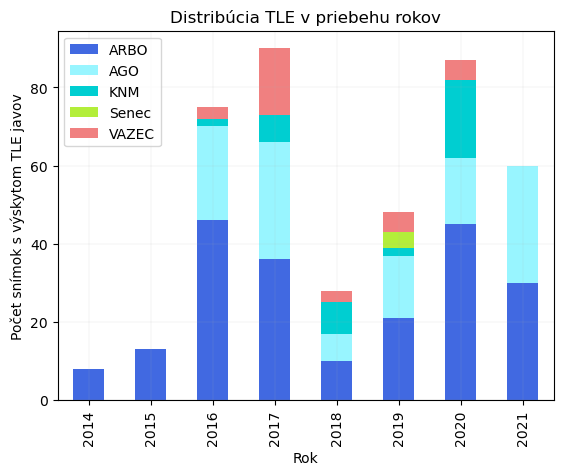

In [9]:
# import data
data = pd.read_csv("/home/jovyan/data/lightning/LiviaMurankova/DATA/tables/year_counts_without_copies.csv")

# view data
data
 
# plot data in stack manner of bar type

data.plot(x='Year', kind='bar', stacked=True, 
        color={"ARBO": "#4169E1", "AGO": "#98F5FF","KNM": "#00CED1","Senec": "#B3EE3A","VAZEC": "#F08080"},
        title='Distribúcia TLE v priebehu rokov')
plt.grid(linewidth = 0.1)
plt.xlabel("Rok")
plt.ylabel("Počet snímok s výskytom TLE javov")
plt.savefig('plots/graph_Year_Count_without_copies')
plt.show()

### 3D stĺpcový graf pre distribúciu TLE v priebehu mesiacov a rokov
Os x: Mesiace

Os y: Roky

Os z: Početnosť

In [ ]:
# read csv file and create dataframe
data = pd.read_csv("/home/jovyan/data/lightning/LiviaMurankova/DATA/tables/TP_TLEs_without_copies.csv")
data

In [4]:
# drop unnecessary columns
df = data.drop(['File_Name','X','Y','Width','Height'], axis = 1)

# add column class (0 = existing TLE event)
df['class'] = 0

# group data according Month x Year
df['Month1'] = df['Month'].replace({'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7,  'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec':12})
df['Month_Year'] = df['Month'] + "-" + df['Year'].astype(str)

df.head()

In [ ]:
df.dtypes

In [5]:
# create column Counts which contains the number of images created in the same year and month
df['Counts'] = df.groupby(['Month_Year'])['class'].transform('count')

In [6]:
# drop unnecessary (duplicated) records
df = df.drop_duplicates(subset=['Month_Year'])
#df

In [ ]:
# number of records
df.count()

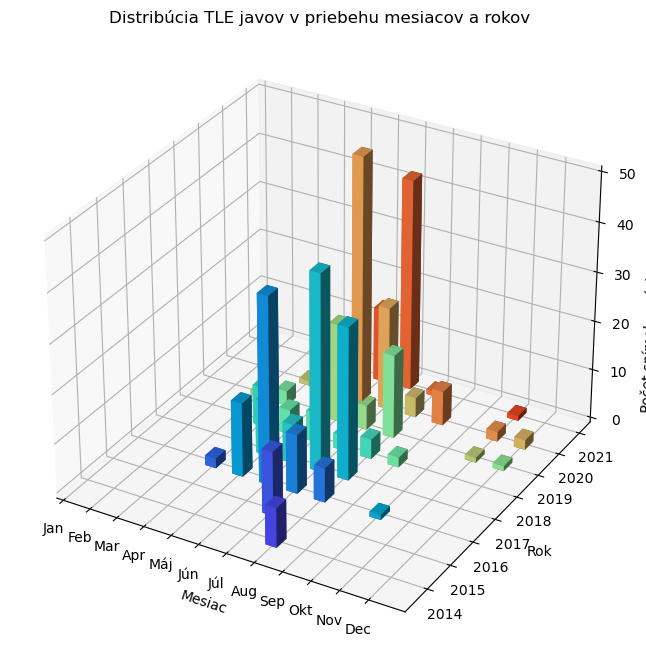

In [7]:
# graph
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim3d(0, 12)
#ax1.set_ylim3d(1, 8)

# positions
xpos = df['Month1']
ypos = df['Year']
zpos = np.zeros(36)

dx = 0.4
dy = 0.4
dz = df['Counts']

values = np.linspace(0.1, 0.9, ypos.ravel().shape[0])
colors = cm.rainbow(values)

plt.xlabel('Mesiac')
plt.ylabel('Rok')
ax1.set_zlabel('Počet snímok s výskytom TLE javov')
ax1.set_title('Distribúcia TLE javov v priebehu mesiacov a rokov')

ax1.bar3d(xpos-2.7*dx, ypos-1.0*dy, zpos, dx, dy, dz, color=colors, shade=True)
ax1.set_xticks(np.arange(12))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Máj', 'Jún', 'Júl',  'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])

plt.savefig('plots/graph_Month_Year_Count_without_copies')
plt.show()

### 3D Distribúcia eventov v priebehu dní a hodín
Os x: Čas v hodinach (0-24)

Os y: Dni (1-365)

Os z: Početnosť

In [ ]:
# read csv file and create dataframe
df = pd.read_csv("/home/jovyan/data/lightning/LiviaMurankova/DATA/tables/TP_TLEs_without_copies.csv")
df.head()

In [12]:
# drop unnecessary columns
df = df.drop(['Index','AMOS_Cam','Year','Month','Day','Minute','File_Name','X','Y','Width','Height'], axis = 1)

# add column class (0 = existing TLE event)
df['class'] = 0

# group data according Hour x Day
df['Hour_Day_In_Year'] = df['Hour'].astype(str) + "-" + df['Day_In_Year'].astype(str)

df.head()

In [ ]:
df.dtypes

In [13]:
df['Counts'] = df.groupby(['Hour_Day_In_Year'])['class'].transform('count')

In [14]:
df = df.drop_duplicates(subset=['Hour_Day_In_Year'])

In [ ]:
df.count()

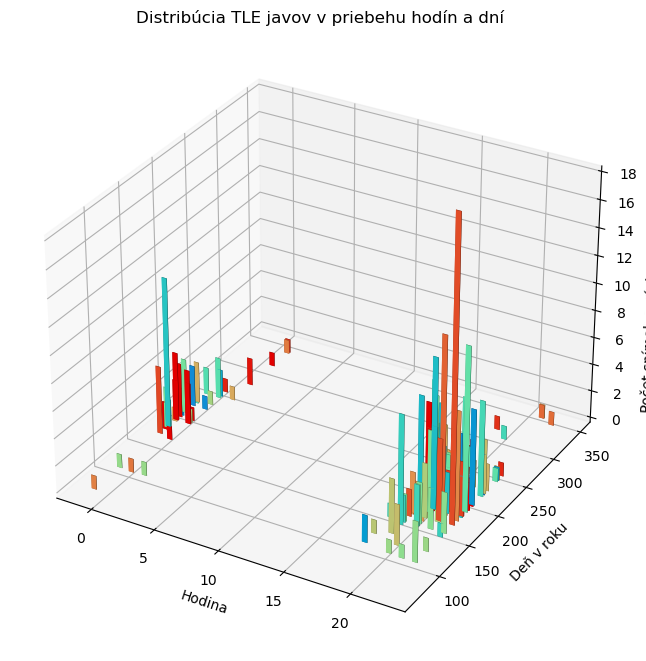

In [16]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.set_xlim3d(0, 12)
#ax1.set_ylim3d(1, 8)
ax1.set_zlim3d(0, 18)

# positions
xpos = df['Hour']
ypos = df['Day_In_Year']
zpos = np.zeros(146)

dx = 0.4
dy = 0.4
dz = df['Counts'] 

values = np.linspace(0.2, 1.1, zpos.ravel().shape[0])
colors = cm.rainbow(values)

plt.xlabel('Hodina')
plt.ylabel('Deň v roku')
ax1.set_zlabel('Počet snímok s výskytom TLE javov')
ax1.set_title('Distribúcia TLE javov v priebehu hodín a dní')

ax1.bar3d(xpos-2.7*dx, ypos-1.0*dy, zpos, dx, dy, dz, color=colors, shade=True)

plt.savefig('plots/graph_Hodina_Den_Pocet_without_copies')
plt.show()